In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt

mpl.rcParams['text.usetex'] = True

In [9]:
# np.savez('dump.npz',vf=vf,corrSum=corrSum,r2Sum=r2Sum)

content = np.load('dump.npz')
vf = content['vf']
corrSum = content['corrSum']
r2Sum = content['r2Sum']
minrt = content['minrt']
maxrt = content['maxrt']
ner = content['ner']
tQ = content['tQ']
tR = content['tR']
dt = content['dt']

/home/jhelsas/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 887 but corresponding boolean dimension is 886
/home/jhelsas/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in divide


ValueError: On entry to DGELSD parameter number 6 had an illegal value

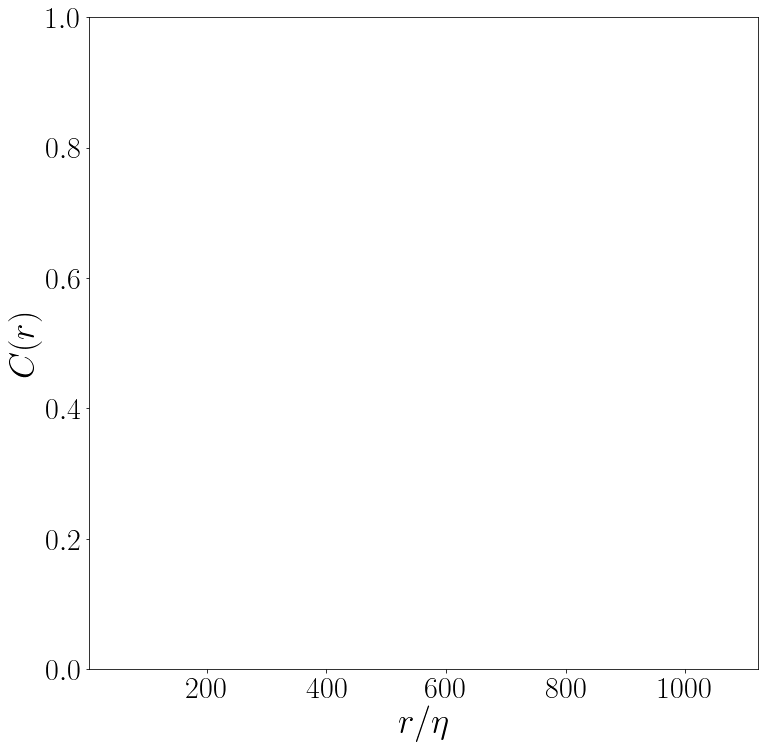

In [10]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-4),10**(0)])

corrF = corrSum/r2Sum
tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
c = 'r-'
fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
print("t = : Linear fit [alpha A] = "+str(fit))
plt.loglog(bins/eta,(corrF)/(corrF[0]),c,label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:},{two:}] \times [{tree:},{four:}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')

plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.000415, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.000415, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})